In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, Dropdown, IntSlider
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [469]:

ss_data = pd.read_excel("US Superstore data.xls")
display(ss_data.head())


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [34]:
# number of rows and columns(+ names of columns)
print("Dataset Shape:",ss_data.shape)
print("\n Column names:")
print(ss_data.columns.tolist())

Dataset Shape: (9994, 21)

 Column names:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [387]:
ss_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [36]:
ss_data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [37]:
ss_data.isnull().sum() # check if there are missing values in the dataset

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Handle missing values and duplicates

In [422]:
print("Duplicate rows:", ss_data.duplicated().sum()) # Check for duplicates
ss_data = ss_data.drop_duplicates() # Remove duplicates if any
print("\nMissing values per column:")
print(ss_data.isnull().sum()) #handle missing values

Duplicate rows: 0

Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [398]:
if 'Postal Code' in ss_data.columns:
    ss_data['Postal Code'] = ss_data['Postal Code'].fillna(0) #Fill missing postal codes with 0 or remove rows

1. Which states have the most sales?

In [427]:
top_state_sales = ss_data.groupby('State')['Sales'].sum().sort_values(ascending=False).head()

print(f"\nTop two states with highest sales are {top_state_sales.index[0]}(${top_state_sales[0]:,.0f}) and {top_state_sales.index[1]}(${top_state_sales[1]:,.0f}) ")


Top two states with highest sales are California($457,688) and New York($310,876) 


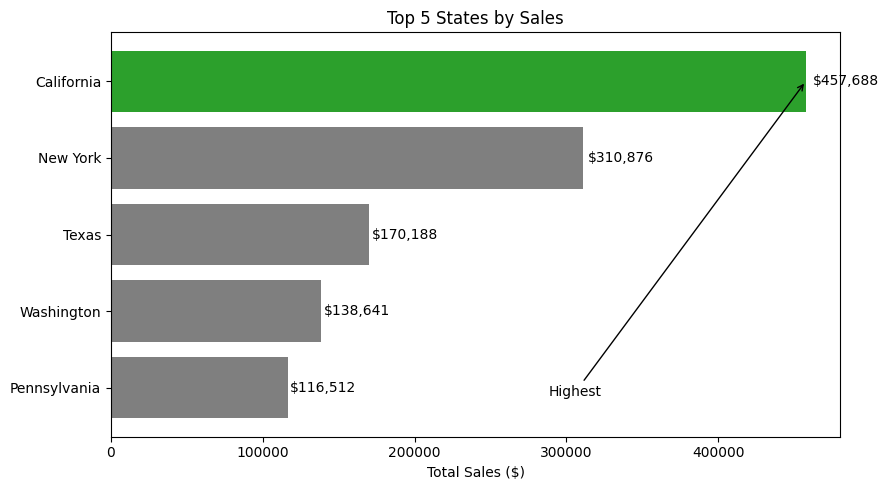

In [402]:
colors = ['tab:green'] + ['tab:gray']*(len(s)-1)
fig, ax = plt.subplots(figsize=(9,5))
bars = ax.barh(top_state_sales.index, top_state_sales.values, color=colors)
ax.invert_yaxis()  # highest on top
ax.set_title('Top 5 States by Sales')
ax.set_xlabel('Total Sales ($)')

for rect, v in zip(bars, top_state_sales.values):
    ax.text(v*1.01, rect.get_y()+rect.get_height()/2, f'${v:,.0f}', va='center')

# Optional: call out the winner
ax.annotate('Highest', xy=(top_state_sales.iloc[0], 0), xytext=(0.6, 0.1), textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->'))

plt.tight_layout(); plt.show()

2. What is the difference between New York and California in terms of sales and profit?

In [327]:
# Calculating total sales in California and New York states
total_sales_per_state = ss_data.groupby("State")["Sales"].sum()
ny_sales = total_sales_per_state.get("New York",0)
california_sales = total_sales_per_state.get("California",0)

# Calculating total profit in California and New York states
total_profit_per_state = ss_data.groupby("State")["Profit"].sum()
ny_profit = total_profit_per_state.get("New York",0)
california_profit = total_profit_per_state.get("California",0)
# Calculating profit margin for both states based on their total sales and profit
ny_margin = (ny_profit / ny_sales * 100) if ny_sales else float("nan")
ca_margin = (california_profit / california_sales * 100) if california_sales else float("nan")


print(f"Total sales in New York state are ${ny_sales:,.0f} with a profit of ${ny_profit:,.0f}.")
print(f"Total sales in California state are ${california_sales:,.0f}  with a profit of ${california_profit:,.0f}.")
print(f"NY profit margin: {ny_margin:.1f}%")
print(f"CA profit margin: {ca_margin:.1f}%")

Total sales in New York state are $310,876 with a profit of $74,039.
Total sales in California state are $457,688  with a profit of $76,381.
NY profit margin: 23.8%
CA profit margin: 16.7%


In [318]:
# diffrences in sales and profit between California and NY states
sales_diff = int(california_sales - ny_sales)
profit_diff = int(california_profit - ny_profit)

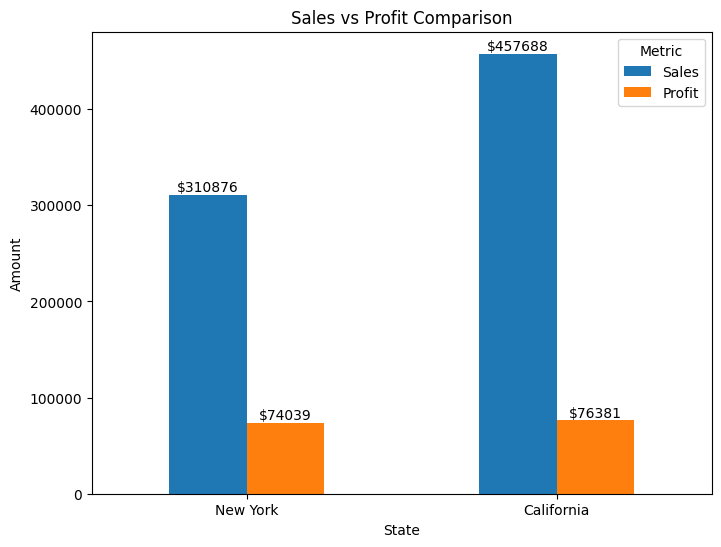

In [312]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Sales": [ny_sales, california_sales],
    "Profit": [ny_profit, california_profit]}
df = pd.DataFrame(data, index=["New York", "California"])
ax = df.plot(kind="bar", figsize=(8, 6))
for container in ax.containers:
    ax.bar_label(container, fmt="$%.0f")
plt.title("Sales vs Profit Comparison")
plt.ylabel("Amount")
plt.xlabel("State")
plt.xticks(rotation=0)  # keep state names horizontal
plt.legend(title="Metric")
plt.show()

In [ ]:
print("\nImportant insights:")

print(f"Sales:\n - California ${california_sales:,.0f} vs New York ${ny_sales:,.0f} (${sales_diff:+,.0f})\n")
print(f"Profit:\n - California ${california_profit:,.0f} vs New York ${ny_profit:,.0f} (${profit_diff:+,.0f})\n")

print(f"Profit margin:\n- NY profit margin = {ny_margin:.1f}%")
print(f"- CA profit margin = {ca_margin:.1f}%")
print("\nConclusion: California has higher sales and slightly higher profit compared to New York but California's profit margin is lower")


Conclusion:
Sales:
 - California $457,688 vs New York $310,876 ($+146,811)

Profit:
 - California $76,381 vs New York $74,039 ($+2,342)

Profit margin:
- NY profit margin = 23.8%
- CA profit margin = 16.7%

Conclusion: California has higher sales and slightly higher profit compared to New York but California's profit margin is lower


3. Who is an outstanding customer in New York?


In [ ]:
top_customer = ss_data.groupby(["Customer Name","State"])["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
ny_best_customer = (top_customer[top_customer["State"] == "New York"].sort_values("Sales", ascending=False).iloc[0])

print(f"The most outstanding customer in New York state is {ny_best_customer[0]} with sales: ${ny_best_customer[2]:,.0f}")

The most outstanding customer in New York state is Tom Ashbrook with sales: $13,723


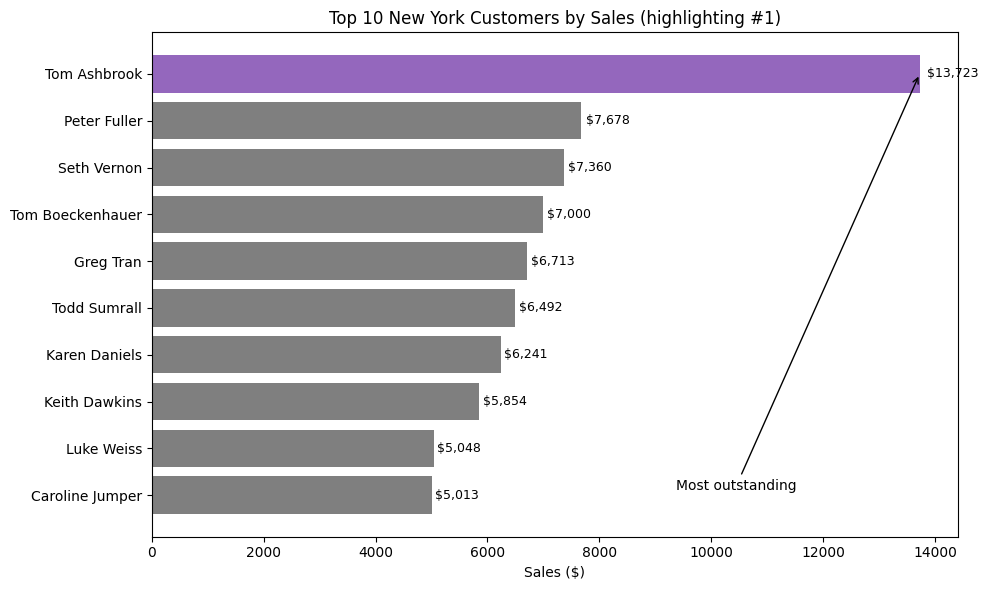

In [403]:
ny_customers = (
    top_customer[top_customer["State"] == "New York"]
    .sort_values("Sales", ascending=False)
)

N = min(10, len(ny_customers))
ny_top10 = ny_customers.head(N).copy()

# Highlight the most outstanding (best) customer
best_name = ny_best_customer["Customer Name"]
colors = ["tab:purple" if name == best_name else "tab:gray"
          for name in ny_top10["Customer Name"]]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(ny_top10["Customer Name"], ny_top10["Sales"], color=colors)
ax.invert_yaxis()  # highest at the top
ax.set_title("Top 10 New York Customers by Sales (highlighting #1)")
ax.set_xlabel("Sales ($)")

# Value labels
for rect, v in zip(bars, ny_top10["Sales"]):
    ax.text(rect.get_width()*1.01,
            rect.get_y() + rect.get_height()/2,
            f"${v:,.0f}", va="center", ha="left", fontsize=9)

# Callout arrow for the best customer (works even if tie order changes)
names_order = ny_top10["Customer Name"].tolist()
best_pos = names_order.index(best_name)
best_bar = bars[best_pos]
ax.annotate("Most outstanding",
            xy=(best_bar.get_width(), best_bar.get_y() + best_bar.get_height()/2),
            xytext=(0.65, 0.1), textcoords="axes fraction",
            arrowprops=dict(arrowstyle="->"),
            ha="left", va="center")

plt.tight_layout()
plt.show()

4. Are there any differences among states in profitability?

In [380]:
# Calculating state perforance based on Sales and Profit
state_performance = ss_data.groupby("State")[["Sales", "Profit"]].sum().reset_index()
# Making sure all values are numeric and make bad entries NaN
state_performance["Sales"] = pd.to_numeric(state_performance["Sales"], errors="coerce")
state_performance["Profit"] = pd.to_numeric(state_performance["Profit"], errors="coerce")
# Calculating Profit margin based on states performances in terms of Profit and Sales
state_performance['Profit Margin %'] = ((state_performance["Profit"]/state_performance["Sales"]) * 100).round(0)

# Sorting all states based on Profit Margin in descending order
state_performance = state_performance.sort_values(by = "Profit Margin %", ascending = False)
# Picking which series we want to color by.In this case by "Profit Margin %"
s = state_performance.set_index("State")["Profit Margin %"].astype(float)
s

State
District of Columbia    37.0
Minnesota               36.0
Delaware                36.0
Maine                   36.0
Arkansas                34.0
Indiana                 34.0
Montana                 33.0
Georgia                 33.0
Rhode Island            32.0
Michigan                32.0
Kentucky                31.0
South Dakota            30.0
Maryland                30.0
Alabama                 30.0
Kansas                  29.0
Missouri                29.0
Mississippi             29.0
New Jersey              27.0
Nebraska                27.0
Connecticut             26.0
Iowa                    26.0
Virginia                26.0
Wisconsin               26.0
Vermont                 25.0
Oklahoma                25.0
North Dakota            25.0
Massachusetts           24.0
New Mexico              24.0
New York                24.0
Louisiana               24.0
Washington              24.0
Utah                    23.0
New Hampshire           23.0
South Carolina          21.0
Nevada  

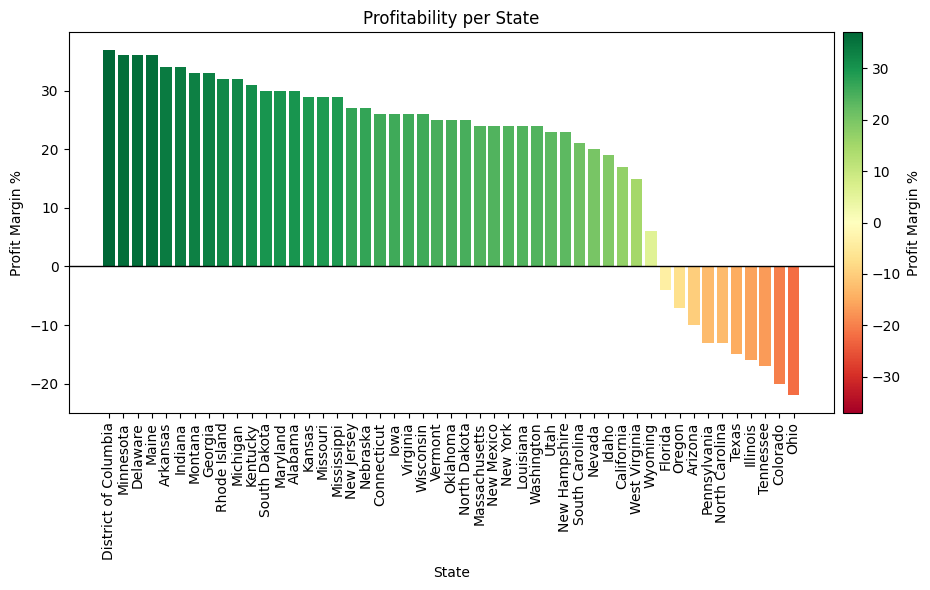

In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# Normalize symmetrically around 0 so negatives are red, positives green
m = np.nanmax(np.abs(s.values)) if len(s) else 1
norm = TwoSlopeNorm(vmin=-m, vcenter=0, vmax=m)
cmap = plt.cm.RdYlGn

colors = cmap(norm(s.values))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(s.index, s.values, color=colors)
ax.axhline(0, color="black", linewidth=1)

# Color bar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label("Profit Margin %")

ax.set_title("Profitability per State")
ax.set_ylabel("Profit Margin %")
ax.set_xlabel("State")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [382]:

hi_prof= state_performance.loc[state_performance["Profit Margin %"].idxmax()]
lo_prof = state_performance.loc[state_performance["Profit Margin %"].idxmin()]
neg_count = (state_performance["Profit Margin %"] < 0).sum()

print(
    f"Conclusion:\nState profitability differs: highest = {hi_prof['State']} ({hi_prof['Profit Margin %']:.1f}%), "
    f"lowest = {lo_prof['State']} ({lo_prof['Profit Margin %']:.1f}%), spread = {(hi_prof['Profit Margin %']-lo_prof['Profit Margin %']):.1f} pp; "
    f"\n{neg_count} states have negative margins.")

Conclusion:
State profitability differs: highest = District of Columbia (37.0%), lowest = Ohio (-22.0%), spread = 59.0 pp; 
10 states have negative margins.


5. Determine if 20% of the customers contribute to 80% of the profit (Pareto principle).

In [ ]:
import math
# Making sure values in "Profit" column are numeric
ss_data["Profit"] = pd.to_numeric(ss_data["Profit"])
# Determining a total profit from top 20% of  costumers
profit_per_customer = (ss_data.groupby("Customer Name", as_index=False)["Profit"].sum().sort_values("Profit", ascending=False))
top20percent_customer=math.ceil(0.20 * len(profit_per_customer))
total_num_customers = len(profit_per_customer)
top20_total_profit = profit_per_customer["Profit"][:top20percent_customer].sum()

# Determining a total profit from all customers
total_profit = ss_data["Profit"].sum()
total_profit
print(f"\nTotal profit from all customers: {total_profit:,.0f}$ ")
print(f"Total profit from top20 customers: {top20_total_profit:,.0f}$ ")


Total profit from all customers: 286,397$ 
Total profit from top20 customers: 233,885$ 


In [337]:
# Calculate if 20% of customers contribute to 80% of the profit (Pareto principle)
percent_profit =(top20_total_profit/total_profit) *100
print(f"\nConclusion: 20% of the customers represent {percent_profit:,.0f}% of the profits.")
print("We can apply Pareto principle to custoners and profit in this case")


Conclusion: 20% of the customers represent 82% of the profits.
We can apply Pareto principle to custoners and profit in this case


6. Are there any difference among cities in profitability ?

Top 20 by Sales:  20 cities
Top 20 by Profit: 20 cities
Union size: 27 cities

Highest margin among these cities: Atlanta (40.7%)
Lowest  margin among these cities: San Antonio (-33.4%)
Spread in profitability: 74.1 percentage points

High sales but not top profit (likely lower margins): ['Burlington', 'Chicago', 'Dallas', 'Houston', 'Jacksonville', 'Philadelphia', 'San Antonio']
High profit but not top sales (likely higher margins): ['Atlanta', 'Henderson', 'Lakewood', 'Milwaukee', 'Minneapolis', 'Providence', 'Richmond']


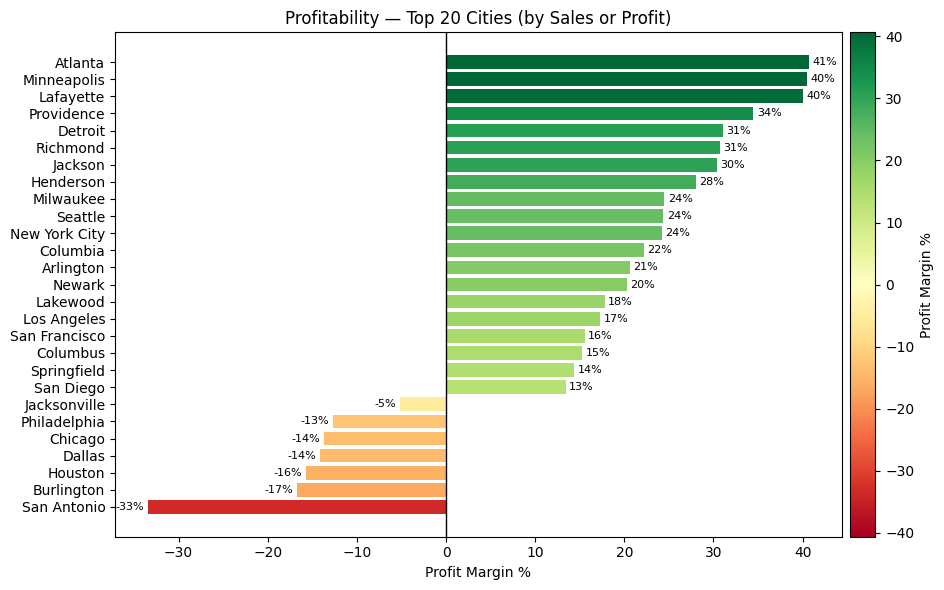

In [ ]:
# Calculating city perforance based on Sales and Profit
city_performance = ss_data.groupby("City")[["Sales", "Profit"]].sum().reset_index()
# Make sure all values are numeric and avoid dividing by zero
for col in ("Sales", "Profit"):
    city_performance[col] = pd.to_numeric(city_performance[col], errors="coerce")
city_performance = city_performance.dropna(subset=["Sales", "Profit"])
city_performance = city_performance[city_performance["Sales"] != 0]

# Calculating Profit Margin of each city
city_performance['Profit Margin %'] = ((city_performance['Profit'] / city_performance['Sales']) * 100)

# Determining top 20 cities in terms of Sales and Profit separately
top20city_sales  = city_performance.nlargest(20, "Sales").copy()
top20city_profit = city_performance.nlargest(20, "Profit").copy()

# Union of top cities + ranks (computed across all cities)

city_performance["Sales Rank"]  = city_performance["Sales"].rank(ascending=False, method="min").astype(int)
city_performance["Profit Rank"] = city_performance["Profit"].rank(ascending=False, method="min").astype(int)

union_cities = set(top20city_sales["City"]).union(set(top20city_profit["City"]))
union20 = city_performance[city_performance["City"].isin(union_cities)].copy()
union20["Rank Gap"] = union20["Profit Rank"] - union20["Sales Rank"] 

hi = union20.loc[union20["Profit Margin %"].idxmax()]
lo = union20.loc[union20["Profit Margin %"].idxmin()]
spread = hi["Profit Margin %"] - lo["Profit Margin %"]

only_sales  = sorted(set(top20city_sales["City"])  - set(top20city_profit["City"]))
only_profit = sorted(set(top20city_profit["City"]) - set(top20city_sales["City"]))


print(f"Top 20 by Sales:  {len(top20city_sales)} cities")
print(f"Top 20 by Profit: {len(top20city_profit)} cities")
print(f"Union size: {len(union20)} cities\n")

print(f"Highest margin among these cities: {hi['City']} ({hi['Profit Margin %']:.1f}%)")
print(f"Lowest  margin among these cities: {lo['City']} ({lo['Profit Margin %']:.1f}%)")
print(f"Spread in profitability: {spread:.1f} percentage points\n")

print("High sales but not top profit (likely lower margins):", only_sales)
print("High profit but not top sales (likely higher margins):", only_profit)

s = union20.set_index("City")["Profit Margin %"].sort_values()
m = np.nanmax(np.abs(s.values)) if len(s) else 1
norm = TwoSlopeNorm(vmin=-m, vcenter=0, vmax=m)
cmap = plt.cm.RdYlGn
colors = cmap(norm(s.values))

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(s.index, s.values, color=colors)
ax.axvline(0, color="black", lw=1)
ax.set_title("Profitability — Top 20 Cities (by Sales or Profit)")
ax.set_xlabel("Profit Margin %")

for rect, v in zip(bars, s.values):
    ax.text(v + (0.01*m if v>=0 else -0.01*m),
            rect.get_y()+rect.get_height()/2,
            f"{v:.0f}%",
            va="center", ha="left" if v>=0 else "right", fontsize=8)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm); sm.set_array([])
fig.colorbar(sm, ax=ax, pad=0.01, label="Profit Margin %")
plt.tight_layout(); plt.show()


7. Top 20 customers by Sales

In [457]:
top_customers = ss_data.groupby("Customer Name")["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False).head(20)
names=",".join(top_customers["Customer Name"].astype(str).head(20))
print(f"\nTop 20 customers by sales:",names)
# display(names)


Top 20 customers by sales: Sean Miller,Tamara Chand,Raymond Buch,Tom Ashbrook,Adrian Barton,Ken Lonsdale,Sanjit Chand,Hunter Lopez,Sanjit Engle,Christopher Conant,Todd Sumrall,Greg Tran,Becky Martin,Seth Vernon,Caroline Jumper,Clay Ludtke,Maria Etezadi,Karen Ferguson,Bill Shonely,Edward Hooks


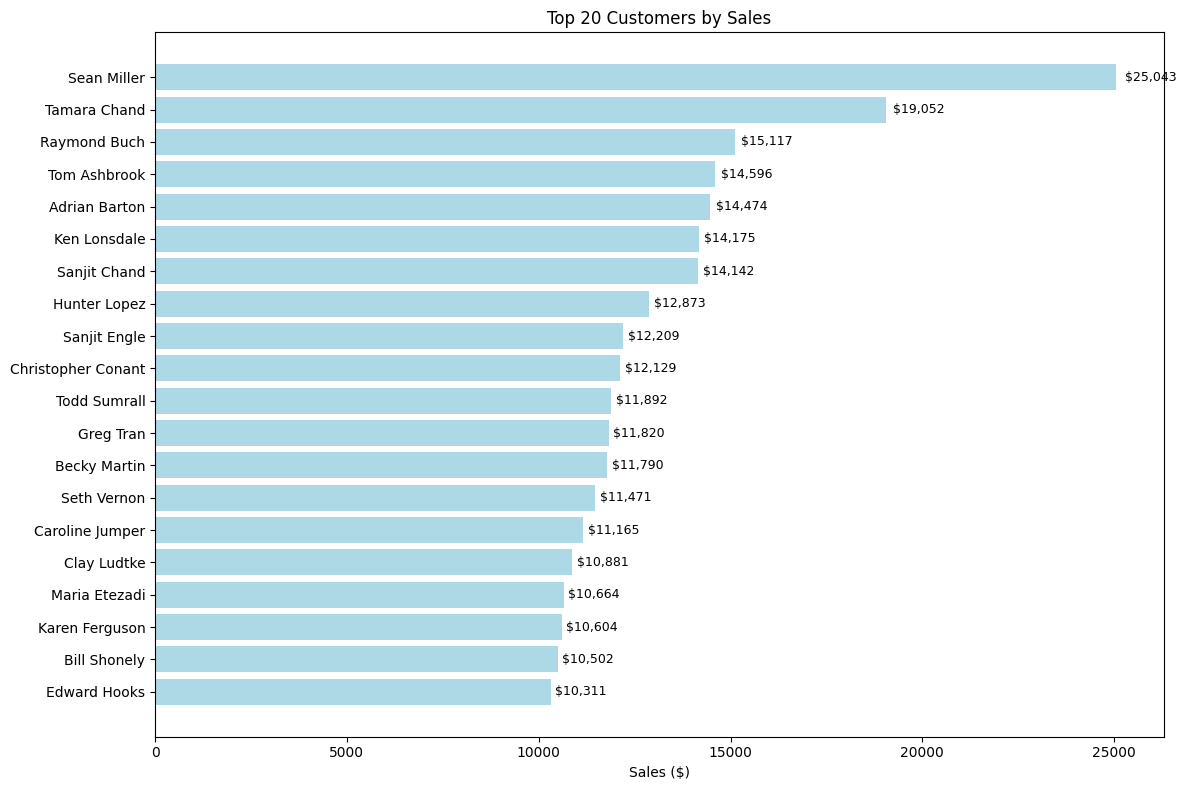

In [405]:
df = top_customers.copy()  # has columns: Customer Name, Sales

fig, ax = plt.subplots(figsize=(12, max(6, len(df)*0.4)))
bars = ax.barh(df["Customer Name"], df["Sales"], color="lightblue")
ax.invert_yaxis()  # largest at the top
ax.set_title("Top 20 Customers by Sales")
ax.set_xlabel("Sales ($)")

# value labels
for rect, v in zip(bars, df["Sales"]):
    ax.text(v*1.01, rect.get_y()+rect.get_height()/2, f"${v:,.0f}",
            va="center", ha="left", fontsize=9)

plt.tight_layout()
plt.show()

8. Plot the Cumulative curve in Sales by Customers.

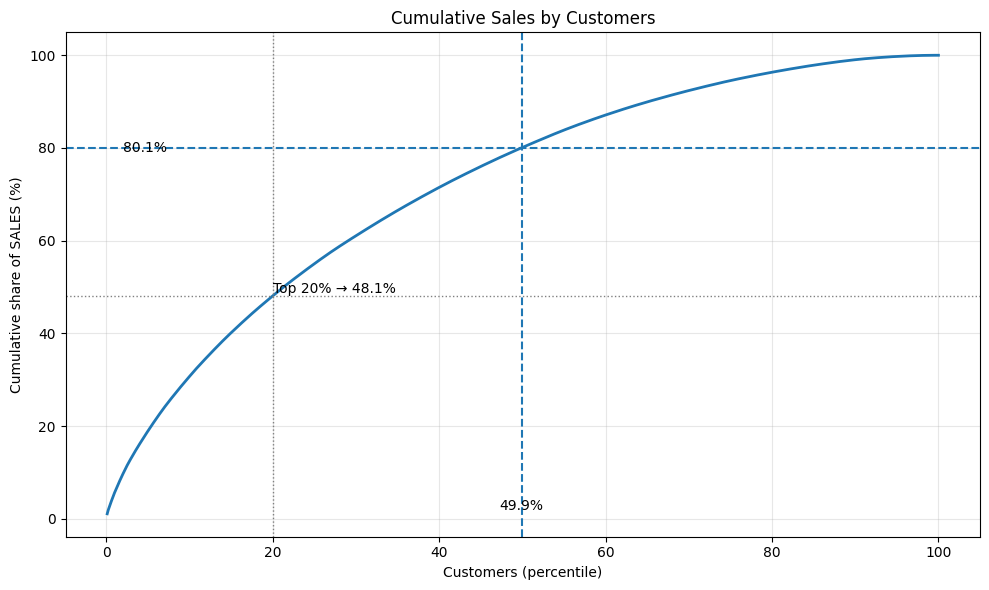

Customers needed to reach 80% of sales: 396 out of 793 (49.9%).
Share of sales contributed by the top 20% of customers: 48.1%.
Conclusion: The concentration differs from the classic 80/20


In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# If you already have this, keep it; otherwise this builds it:
sales_by_customers = (
    ss_data.groupby("Customer Name")["Sales"]
    .sum()
    .reset_index()
    .sort_values(by="Sales", ascending=False)
)

df = sales_by_customers.copy()
df["Sales"] = pd.to_numeric(df["Sales"], errors="coerce").fillna(0)

# (Optional) drop zero-sales customers so the curve is cleaner
df = df[df["Sales"] > 0]

n = len(df)
total_sales = df["Sales"].sum()

# 1) Cumulative sales and cumulative % of total
df["CumSales"]    = df["Sales"].cumsum()
df["CumSalesPct"] = df["CumSales"] / total_sales * 100  # 0→100

# 2) X-axis as customer percentile (1..100%)
x_pct = np.arange(1, n + 1) / n * 100

# 3) Plot cumulative curve
plt.figure(figsize=(10, 6))
plt.plot(x_pct, df["CumSalesPct"].values, linewidth=2)
plt.xlabel("Customers (percentile)")
plt.ylabel("Cumulative share of SALES (%)")
plt.title("Cumulative Sales by Customers")
plt.grid(alpha=0.3)

# 4) Pareto check A: “What % of customers produce 80% of sales?”
idx80 = min(int(np.searchsorted(df["CumSalesPct"].values, 80)), n - 1)
cust_for_80 = idx80 + 1
x80 = cust_for_80 / n * 100
y80 = df.iloc[idx80]["CumSalesPct"]
plt.axvline(x80, linestyle="--")
plt.axhline(y80, linestyle="--")
plt.text(x80, 2, f"{x80:.1f}%", ha="center")
plt.text(2, y80, f"{y80:.1f}%", va="center")

# 5) Pareto check B: “How much do the top 20% of customers contribute?”
k20 = int(np.ceil(0.20 * n))
share_top20 = df["Sales"].iloc[:k20].sum() / total_sales * 100
plt.axvline(20, color="gray", linestyle=":", linewidth=1)
plt.axhline(share_top20, color="gray", linestyle=":", linewidth=1)
plt.text(20, share_top20, f"Top 20% → {share_top20:.1f}%", va="bottom", ha="left")

plt.tight_layout()
plt.show()

print(f"Customers needed to reach 80% of sales: {cust_for_80} out of {n} ({x80:.1f}%).")
print(f"Share of sales contributed by the top 20% of customers: {share_top20:.1f}%.")

# Simple interpretation
if x80 <= 25 and 70 <= share_top20 <= 90:
    print("Conclusion: The Pareto principle roughly holds (sales are highly concentrated).")
else:
    print("Conclusion: The concentration differs from the classic 80/20")




In [467]:
# Generate automated insights for executive summary
print("=== EXECUTIVE SUMMARY - KEY FINDINGS ===")

top_state_sales = ss_data.groupby('State')['Sales'].sum().sort_values(ascending=False).head()
print(f"\n1.Top two states with highest sales are {top_state_sales.index[0]}(${top_state_sales[0]:,.0f}) and {top_state_sales.index[1]}(${top_state_sales[1]:,.0f}) ")
print(f"\n2.California has higher sales (${california_sales:,.0f} vs ${ny_sales:,.0f}) and slightly higher profit (${california_profit:,.0f} vs ${ny_profit:,.0f}) compared to New York.\nHowever, California's profit margin is lower ({ca_margin:.1f}% vs {ny_margin:.1f}%)") 
top_customer = ss_data.groupby(["Customer Name","State"])["Sales"].sum().reset_index().sort_values(by="Sales", ascending=False)
ny_best_customer = (top_customer[top_customer["State"] == "New York"].sort_values("Sales", ascending=False).iloc[0])

print(f"\n3.The most outstanding customer in New York state is {ny_best_customer[0]} with sales: ${ny_best_customer[2]:,.0f}")
print(
    f"\n4.State profitability differs: highest = {hi_prof['State']} ({hi_prof['Profit Margin %']:.1f}%), "
    f"lowest = {lo_prof['State']} ({lo_prof['Profit Margin %']:.1f}%), spread = {(hi_prof['Profit Margin %']-lo_prof['Profit Margin %']):.1f} pp; "
    f"\n{neg_count} states have negative margins.")

print(f"\n5.20% of the customers represent {percent_profit:,.0f}% of the profits.We can apply Pareto principle to custoners and profit in this case")

print(f"\n6.Differences among cities in profotability")
print("- Profitability varies materially across cities, with margins ranging from +40.7% (Atlanta) to –33.4% (San Antonio)—a 74.1 percentage-point spread.")
print("- Several high-revenue markets (Burlington, Chicago, Dallas, Houston, Jacksonville, Philadelphia, San Antonio) do not translate sales volume into top profits, indicating weaker margins.")
print("- In contrast, cities such as Atlanta, Henderson, Lakewood, Milwaukee, Minneapolis, Providence, and Richmond exhibit strong profitability despite not ranking among the top sellers.")
print("- Overall, profitability does not consistently track sales, confirming significant cross-city differences and the need for market-specific strategies.")

print(f"\n7.Top 20 customers by sales:",names)

print(f"\n8.Customers needed to reach 80% of sales: {cust_for_80} out of {n} ({x80:.1f}%).Share of sales contributed by the top 20% of customers: {share_top20:.1f}%.")
print("Conclusion: The concentration differs from the classic 80/20")

print("\n9.Cities and States to prioritize for marketing strategies:")
print("- Prioritize (keep/grow budget): cities that are top-20 in both sales & profit (the overlap).")
print("- Scale winners (high margin, room to grow): Atlanta, Henderson, Lakewood, Milwaukee, Minneapolis, Providence, Richmond.")
print("- Fix margins before heavy spend (high sales, weaker profit): Burlington, Chicago, Dallas, Houston, Jacksonville, Philadelphia.")
print("- Pause until fixed (negative): San Antonio.")
print("- States: Invest in District of Columbia (very strong margin). Keep strong presence in California and New York (work on CA margins). Pause/repair in Ohio until margins turn positive.")



=== EXECUTIVE SUMMARY - KEY FINDINGS ===

1.Top two states with highest sales are California($457,688) and New York($310,876) 

2.California has higher sales ($457,688 vs $310,876) and slightly higher profit ($76,381 vs $74,039) compared to New York.
However, California's profit margin is lower (16.7% vs 23.8%)

3.The most outstanding customer in New York state is Tom Ashbrook with sales: $13,723

4.State profitability differs: highest = District of Columbia (37.0%), lowest = Ohio (-22.0%), spread = 59.0 pp; 
10 states have negative margins.

5.20% of the customers represent 82% of the profits.We can apply Pareto principle to custoners and profit in this case

6.Differences among cities in profotability
- Profitability varies materially across cities, with margins ranging from +40.7% (Atlanta) to –33.4% (San Antonio)—a 74.1 percentage-point spread.
- Several high-revenue markets (Burlington, Chicago, Dallas, Houston, Jacksonville, Philadelphia, San Antonio) do not translate sales volum